# CMPSC 445 - M5 Assignment

### PCA for Data Visualization

#### Load Iris Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# loading dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Data Standardization

In [2]:
# transforming dataset onto the unit scale (mean = 0, variance = 1)

features = ['sepal length','sepal width','petal length','petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()   

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


1. Need for Feature Scaling
    - Feature scaling is a technique to calibrate and normalize the mutually exclusive features within a dataset's fixed range. 
    
    - Feature scaling is needed within a pre-processing data pipeline because it ensures that various features of the dataset contribute equally to a target for an instance during the training process. 
    
    - Using feature scaling also improves convergence for optimization and distance-based techniques like gradient descent and K-Nearest Neighbors and others. 

2. 2 common methods to do scaling

    - Normalization:
        Scales a feature to a fixed range, usually [0, 1].

        $$ X' = \frac{X - X_{min}}{X_{max} - X_{min}} $$

        It is useful for when the relationships between features is needed to be maintained for distance based measurements (like KNN).
        <br><br>
    - Standardization (a.k.a Z-Score Scaling):
        Transforms a feature to have a mean ($\mu$) of 0 and and standard deviation ($\sigma$) of 1.

        $$ X' = \frac{X - \mu}{\sigma} $$
        
        It is useful for algorithms that use a normal distribution of the data like linear or logistic regression.

#### PCA Projection to 2D

In [3]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

3. What is the Curse of Dimensionality?
    - The curse of dimensionality refers to the complexity of high-dimensional data.
    - Models working with higher dimensions of data or a dataset incur a negative impact on their performance due to the amount of computational workload for an increasingly insignificant difference in predictability.
    - The increased workload occurs due to the increased sparsity of each instance across various dimensions, making it it harder to learn patterns.
    - A higher dimensionality also increases computational cost because of the resources required to run models and inference on very high-dimensional data.

4. Principal Component Analysis (PCA) and the Curse of Dimensionality
    -  PCA is a very good method to reduce the dimensionality of a **linear** dataset. It can remove dimensions that are not big contributors to the targets. But if there are less or no useless dimensions in the dataset, reducing the dimensionality with PCA can cause information loss. 
    - For a **nonlinear** dataset, PCA does not work well because PCA finds orthogonal principal components. At times, the dataset can require non-orthogonal principal components to represent the data. Which is where PCA can fail to find the maximum variance vectors.

5. PCA Chaining to Reduce Dimensionality
    - It would depend on the context but usually PCA chaining would not be a reasonable method because of the diminishing returns. 
    - Because PCA assumes linear relationships within the features, applying PCA multiple times may not address the inherent nonlinearities in the data.
    - Applying PCA can lead to loss of information without increases in model performance.

#### Visualize 2D Projection

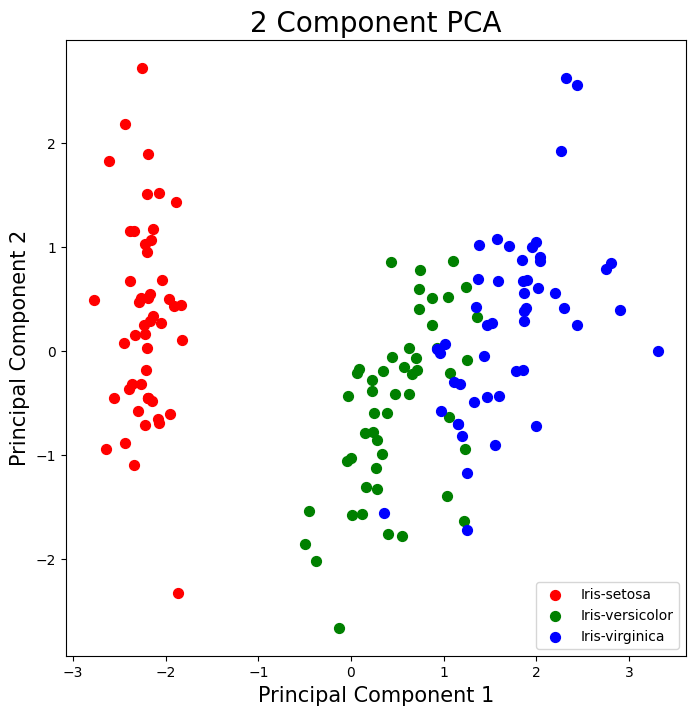

In [4]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)

### Gradient Descent

1. Loss function
    - The loss (or cost) function of a model indicates its prediction performance when compared to the actual target data. 
    - A higher loss results in a worse model performance.
    - The loss function is optimized to be at a minimum while training, so that the model can perform its best when testing.
    - Loss functions are differentiable, continous, and symmetric, making it easier to find extrema, when optimizing them.

2. Gradient Descent getting stuck in a local minimum when training a logistic regression model
    - Gradient descent would not get stuck at a local minimum because it's graph is convex shaped. So, it would have only one optimum point.

3. Gradient Descent Algorithm with differently scaled features
    - When training with features that not scaled or are scaled differently, the gradient descent algorithm would suffer because of the graph of the loss function.
    - It would take a longer time for it converge because the features with the larger scales would largely influence the loss function which can make the optimization space irregular, and make the graph have more flattened regions, making it harder for the algorithm to find convergence.
    - Because of which, it would take longer time to find the global minimum and lead to worse learning rates. 

4. Gradient Descent vs Stochastic Gradient Descent (SGD)
    - Gradient Descent is an iterative optimization algorithm that determines the gradient of the loss function for an entire dataset. It involves updating the model's parameters based on the average gradient over all the training examples. 
    - Stochastic Gradient Descent (SGD) is another iterative optimization algorithm that determines the gradient of the loss function for a single training example and updates the model's parameters according to that single gradient instance. The iterative process continues with randomly selected training examples from the dataset until the algorithm reaches a predetermined stopping point.

    - SGD is faster than Gradient Descent because it only requires one training example per iteration, whereas gradient descent requires the entire dataset. So, SGD can scale better for larger datasets, while requiring lesser memory.
    - Gradient Descent produces more accurate results because it uses the average gradient calculated over the entire dataset. SGD is less accurate than gradient descent because it calculates the gradient only on one training example per iteration, which may not accurately represent the entire dataset.